In [10]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [11]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv")

In [12]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [13]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [14]:
strings = list(df.dtypes[df.dtypes == 'object'].index)

In [15]:
strings

['origin', 'fuel_type', 'drivetrain']

In [16]:
for col in strings:
    df[col]= df[col].str.lower().replace(' ', '_')

In [17]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,europe,gasoline,all-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,usa,gasoline,front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,europe,gasoline,front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,usa,diesel,all-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,europe,gasoline,all-wheel drive,2.0,12.488369


In [18]:
df.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

In [19]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

engine_displacement
[170 130 220 210 190]
36

num_cylinders
[ 3.  5. nan  4.  1.]
14

horsepower
[159.  97.  78.  nan 140.]
192

vehicle_weight
[3413.43375861 3149.66493422 3079.03899737 2542.39240183 3460.87098999]
9704

acceleration
[17.7 17.8 15.1 20.2 14.4]
162

model_year
[2003 2007 2018 2009 2008]
24

origin
['europe' 'usa' 'asia']
3

fuel_type
['gasoline' 'diesel']
2

drivetrain
['all-wheel drive' 'front-wheel drive']
2

num_doors
[ 0.  2. -1.  1. nan]
9

fuel_efficiency_mpg
[13.23172891 13.68821744 14.246341   16.9127356  12.48836912]
9704



In [20]:
%matplotlib inline

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

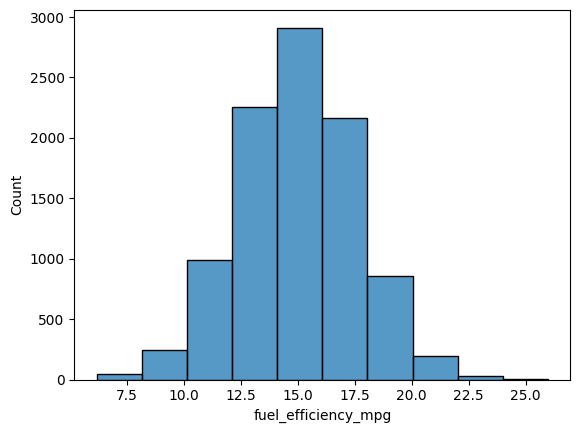

In [22]:
sns.histplot(df.fuel_efficiency_mpg, bins=10)

In [24]:
df.isnull()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
9699,False,False,False,False,False,False,False,False,False,True,False
9700,False,True,False,False,False,False,False,False,False,False,False
9701,False,False,False,False,False,False,False,False,False,False,False
9702,False,False,False,False,False,False,False,False,False,False,False


In [25]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [48]:
df['horsepower'].median(skipna=True)

np.float64(149.0)

In [26]:
n=len(df)
n_val=int(len(df) * 0.2)
n_test=int(len(df) * 0.2)
n_train=int(len(df) * 0.6)

In [27]:
n, n_val+n_test+n_train

(9704, 9702)

In [28]:
n_train =n-n_val-n_test

In [29]:
n, n_val+n_test+n_train

(9704, 9704)

In [30]:
 n_val, n_test, n_train

(1940, 1940, 5824)

In [31]:
df.iloc[[10, 0, 3, 5]]

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
10,230,5.0,100.0,3111.810181,15.4,2014,europe,diesel,all-wheel drive,0.0,13.386605
0,170,3.0,159.0,3413.433759,17.7,2003,europe,gasoline,all-wheel drive,0.0,13.231729
3,220,4.0,NaN,2542.392402,20.2,2009,usa,diesel,all-wheel drive,2.0,16.912736
5,190,3.0,NaN,2484.883986,14.7,2008,europe,gasoline,all-wheel drive,-1.0,17.271818


In [32]:
df_train= df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test =df.iloc[n_train+n_val:]


In [33]:
idx =np.arange(n)

In [34]:
np.random.seed(42)
np.random.shuffle(idx)

In [35]:
idx[n_train:]

array([6163, 3313, 4781, ..., 5390,  860, 7270], shape=(3880,))

In [36]:
np.random.shuffle(idx)

In [37]:
df=df[['engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg']]


In [38]:
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [39]:
df_train= df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test =df.iloc[idx[n_train+n_val:]]


In [41]:
df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

In [43]:
y_train=np.log1p(df_train.fuel_efficiency_mpg.values)
y_val=np.log1p(df_val.fuel_efficiency_mpg.values)
y_test=np.log1p(df_test.fuel_efficiency_mpg.values)

In [44]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [49]:
y_train

array([2.97431243, 2.63374473, 2.55327843, ..., 2.75030796, 2.91794377,
       2.63748276], shape=(5824,))

In [50]:
mean_horsepower = df['horsepower'].mean()
